<a href="https://colab.research.google.com/github/marziaafriliani/python_tugas/blob/main/python_tugas11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [3]:
ls

dataset/  IMG_20200815_201222_HDR.jpg  python_tugas11.ipynb


In [4]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [5]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [6]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((64, 64))) / 255.0
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [7]:
print(labels)

['GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04', 'GMB_04',

In [8]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [9]:
print(labels)

[[0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [10]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 64, 64, 3)
(146, 64, 64, 3)


In [11]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

In [17]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

[INFO] training network...
Epoch 1/25
14/14 [==============================] - 1s 76ms/step - loss: 0.2922 - accuracy: 0.8950 - val_loss: 0.5344 - val_accuracy: 0.7671
Epoch 2/25
14/14 [==============================] - 1s 67ms/step - loss: 0.2400 - accuracy: 0.9384 - val_loss: 0.5007 - val_accuracy: 0.8082
Epoch 3/25
14/14 [==============================] - 1s 67ms/step - loss: 0.2330 - accuracy: 0.9338 - val_loss: 0.4841 - val_accuracy: 0.8014
Epoch 4/25
14/14 [==============================] - 1s 66ms/step - loss: 0.2130 - accuracy: 0.9292 - val_loss: 0.5507 - val_accuracy: 0.7945
Epoch 5/25
14/14 [==============================] - 1s 67ms/step - loss: 0.2333 - accuracy: 0.9224 - val_loss: 0.7337 - val_accuracy: 0.7534
Epoch 6/25
14/14 [==============================] - 1s 67ms/step - loss: 0.2441 - accuracy: 0.9224 - val_loss: 0.7304 - val_accuracy: 0.7260
Epoch 7/25
14/14 [==============================] - 1s 67ms/step - loss: 0.2788 - accuracy: 0.8973 - val_loss: 0.5672 - val_acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


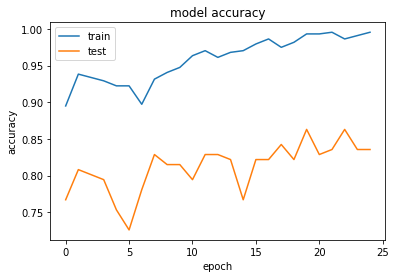

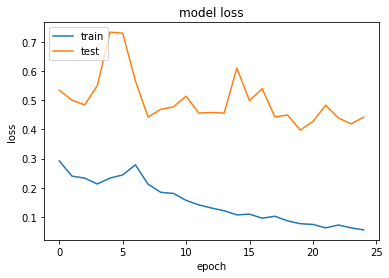

In [18]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.90      0.64      0.75        28
      GMB_02       0.80      0.86      0.83        28
      GMB_03       0.88      0.85      0.86        26
      GMB_04       0.85      0.92      0.88        36
      GMB_05       0.78      0.89      0.83        28

    accuracy                           0.84       146
   macro avg       0.84      0.83      0.83       146
weighted avg       0.84      0.84      0.83       146



In [20]:
model1.save('nnmodel1_dataset')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel1_dataset/assets


In [21]:
import cv2
import matplotlib.pyplot as plt
image1='IMG_20200815_201222_HDR.jpg'

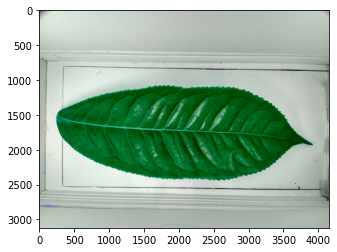

In [22]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [24]:
image_testing = Image.open('IMG_20200815_201222_HDR.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [25]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [26]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[9.9157435e-01 8.4190872e-03 1.1860585e-06 1.1114348e-07 5.1873626e-06]]
['GMB_01']
